In [2]:
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Distributions.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

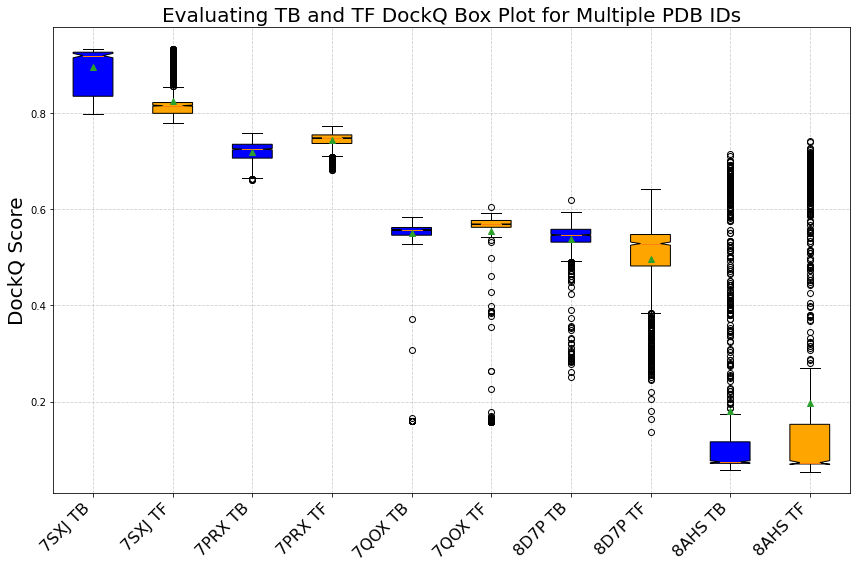

Statistics for 7SXJ TB:
  Median: 0.9195070121902607
  Q1 (25th percentile): 0.8350031459683083
  Q3 (75th percentile): 0.9149610228137223
  Whisker low: 0.7979379329642257
  Whisker high: 0.9335838880296717
  Cap low: 0.7979379329642257
  Cap high: 0.9335838880296717
  Mean: 0.8953967446138762

Statistics for 7SXJ TF:
  Median: 0.8154467578110766
  Q1 (25th percentile): 0.7994938350561389
  Q3 (75th percentile): 0.8143327022825163
  Whisker low: 0.7794675529181095
  Whisker high: 0.8544840455571379
  Cap low: 0.7794675529181095
  Cap high: 0.8544840455571379
  Mean: 0.8261491692472275

Statistics for 7PRX TB:
  Median: 0.7250198711228288
  Q1 (25th percentile): 0.706394874950343
  Q3 (75th percentile): 0.7235907642382526
  Whisker low: 0.6641428034104574
  Whisker high: 0.7596117100848621
  Cap low: 0.6641428034104574
  Cap high: 0.7596117100848621
  Mean: 0.7182664834958264

Statistics for 7PRX TF:
  Median: 0.7478831449072831
  Q1 (25th percentile): 0.7368069979703191
  Q3 (75th per

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Distributions.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()



def load_data(pdb_ids, tb_directory, tf_directory):
    data = {}
    for pdb_id in pdb_ids:
        # Construct file paths for TB and TF based on the given directories and pdb_id
        tb_file_path = f"{tb_directory}/{pdb_id}_DockQ_data_TB.xlsx"
        tf_file_path = f"{tf_directory}/{pdb_id}_DockQ_data_TF.xlsx"
        
        # Load data from Excel files
        tb_data = pd.read_excel(tb_file_path)['DockQ']
        tf_data = pd.read_excel(tf_file_path)['DockQ']
        
        data[pdb_id] = (tb_data, tf_data)
    return data

def print_boxplot_stats(bplot, labels):
    # Print statistics for each box in the boxplot
    for i, label in enumerate(labels):
        median = bplot['medians'][i].get_ydata()[0]
        q1 = bplot['boxes'][i].get_path().vertices[1, 1]
        q3 = bplot['boxes'][i].get_path().vertices[2, 1]
        whisker_low = bplot['whiskers'][2*i].get_ydata()[1]
        whisker_high = bplot['whiskers'][2*i+1].get_ydata()[1]
        cap_low = bplot['caps'][2*i].get_ydata()[1]
        cap_high = bplot['caps'][2*i+1].get_ydata()[1]
        mean = bplot['means'][i].get_ydata()[0]
        
        print(f"Statistics for {label}:")
        print(f"  Median: {median}")
        print(f"  Q1 (25th percentile): {q1}")
        print(f"  Q3 (75th percentile): {q3}")
        print(f"  Whisker low: {whisker_low}")
        print(f"  Whisker high: {whisker_high}")
        print(f"  Cap low: {cap_low}")
        print(f"  Cap high: {cap_high}")
        print(f"  Mean: {mean}\n")

def plot_dockq_boxplots(data, output_directory, dpi=1000):
    # Create a box plot
    plt.figure(figsize=(12, 8))
    all_data = []
    labels = []
    colors = []
    
    for pdb_id, (tb_data, tf_data) in data.items():
        all_data.extend([tb_data, tf_data])
        labels.extend([f'{pdb_id} TB', f'{pdb_id} TF'])
        colors.extend(['blue', 'orange'])

    bplot = plt.boxplot(all_data, patch_artist=True, notch=True, showmeans=True)
    
    # Color the boxes and set labels
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.xticks(range(1, len(labels)+1), labels, rotation=45, ha="right", fontsize=16)
    plt.title('Evaluating TB and TF DockQ Box Plot for Multiple PDB IDs', fontsize=20)
    plt.ylabel('DockQ Score', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save the figure with the specified DPI and white background
    output_file_path = f"{output_directory}/Fig_S16.png"
    plt.savefig(output_file_path, dpi=dpi, facecolor='white')
    plt.show()
    
    # Print the boxplot statistics
    print_boxplot_stats(bplot, labels)

def main(pdb_ids, tb_directory, tf_directory, output_directory):
    data = load_data(pdb_ids, tb_directory, tf_directory)
    plot_dockq_boxplots(data, output_directory)

# Example usage:
tb_directory = "/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Quality_Functions/DockQ/Data/AlphaFold_Multimer_All_TB"  # Directory for template-based files
tf_directory = "/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Quality_Functions/DockQ/Data/AlphaFold_Multimer_All_TF"  # Directory for template-free files
output_directory = "/Users/neginmanshour/Desktop/PpEv/Figures/Supplementary"  # Directory to save the output image
pdb_ids = ["7SXJ", "7PRX", "7QOX", "8D7P", "8AHS"]  # Add your PDB IDs here
main(pdb_ids, tb_directory, tf_directory, output_directory)


